In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [15]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

df = pd.read_excel('/home/fer/Documents/cfDNA/Clinical/Final database cfDNA Breast cancer.xlsx',
                   date_parser=dateparse
                  )
df = df.drop(list(range(38,49,1)))
df.head()

,ID_Final,ID_Tumor_Ernest,ID_Colombia,cfDNA concentration,Fecha toma de muestra tejido,Fecha toma de muestra plasma,Fecha de Patología,RE,RP,Her2,...,STATUS VITAL,ULTIMA FECHA CONOCIDA,FECHA DEFUNCION,PROGRESION TUMORAL,UTIMA FECHA INFORMACION,EDAD,FAMILIAR CON CANCER,PESO (Kg),TALLA (m),IMC (kg/m)^2
0,UEB-0205,5,51,0.81,2011-08-12 00:00:00,2011-09-27 00:00:00,2011-09-27 00:00:00,1,0.4,Negativo,...,1.0,42870.0,NaN,1.0,42870.0,76.0,Sí,55,1.68,19.486961
1,UEB-0208,29,428,0.88,2011-03-16 00:00:00,2011-03-15 00:00:00,2011-04-15 00:00:00,Positivo 80%,Negativo,Negativo,...,1.0,42898.0,NaN,1.0,42884.0,55.0,No,58,1.55,24.141519
2,UEB-0209,31,461,0.36,2011-05-20 00:00:00,2011-06-15 00:00:00,2011-05-20 00:00:00,0.6,0.6,Negativo,...,1.0,42655.0,NaN,1.0,42655.0,51.0,Sí,61,1.4,31.122449
3,UEB-0210,30,466,1.27,2011-05-13 00:00:00,2011-05-24 00:00:00,2011-05-13 00:00:00,1,1,Equivoco (++/+++),...,1.0,42898.0,NaN,9.0,41043.0,55.0,Sí,59,1.64,21.936347
4,UEB-0211,33,469,1.07,2011-07-06 00:00:00,2011-04-26 00:00:00,2011-02-22 00:00:00,1,1,Negativo,...,NaN,42738.0,NaN,2.0,42738.0,68.0,No,72,1.56,29.585799


# Analisis de Fechas

In [16]:
print(type(df['Fecha toma de muestra tejido'][1]), type(df['Fecha de Patología'][1]))


<class 'datetime.datetime'> <class 'datetime.datetime'>


In [17]:
df.columns

Index(['ID_Final', 'ID_Tumor_Ernest', 'ID_Colombia', 'cfDNA concentration',
       'Fecha toma de muestra tejido', 'Fecha toma de muestra plasma',
       'Fecha de Patología', 'RE', 'RP', 'Her2', 'Ki67', 'Fenotipo',
       'DIAGNOSTICO HISTOPATOLOGICO', 'T', 'N', 'M', 'ESTADIO INICIAL',
       'ESTADIO ARREGLADO', 'ESTADIO REDONDEADO', 'SEXO', 'FECHA CIRUGIA',
       'FECHA DE COMIENZO QX', 'FECHA DE COMIENZO RXT', 'TRATAMIENTO',
       'TIPO RXT', 'TIMING RXT', 'TIPO DE QX', 'Nª CICLOS DE QX',
       'RESPUESTA A QX', 'STATUS  VITAL', 'ULTIMA FECHA CONOCIDA',
       'FECHA DEFUNCION ', 'PROGRESION TUMORAL', 'UTIMA FECHA INFORMACION',
       'EDAD', 'FAMILIAR CON CANCER', 'PESO  (Kg)', 'TALLA (m)',
       'IMC (kg/m)^2'],
      dtype='object')

In [18]:
def eval_date_treat(sample_extraction, date_treat, tipo_treat):
    print('Valores considerados: ', sample_extraction, date_treat)
    if sample_extraction == 'No aplica' or date_treat == 'No aplica':
        print('Falta información')
        return 'Falta información'
    else:
        print ('Aplicando filtros ...')
        if sample_extraction > date_treat:
            return 'Se extrajo primero la muestra'
        else:
            return 'Se hizo primero la ' + tipo_treat
    

eval_date_treat(df['Fecha toma de muestra plasma'][12], df['FECHA CIRUGIA'][12], 'cirugia')

Valores considerados:  2016-05-27 00:00:00 2016-05-27 00:00:00
Aplicando filtros ...


'Se hizo primero la cirugia'

In [19]:
sx = ['SX'] * len (df)
qx = ['QX'] * len(df)
rtx = ['RTX'] * len(df)

In [20]:
df['Time_Tejido_Cirugia'] = list(map(eval_date_treat, df['Fecha toma de muestra tejido'],  df['FECHA CIRUGIA'], sx))
print('#=======================================================================#')
df['Time_cfDNA_Cirugia'] =  list(map(eval_date_treat, df['Fecha toma de muestra plasma'],  df['FECHA CIRUGIA'], sx))

print('#=======================================================================#')
df['Time_Tejido_QX'] =  list(map(eval_date_treat, df['Fecha toma de muestra tejido'],  df['FECHA DE COMIENZO QX'], qx))
print('#=======================================================================#')
df['Time_cfDNA_QX'] =  list(map(eval_date_treat, df['Fecha toma de muestra plasma'],  df['FECHA DE COMIENZO QX'], qx))

print('#=======================================================================#')
df['Time_Tejido_RXT'] =  list(map(eval_date_treat, df['Fecha toma de muestra tejido'],  df['FECHA DE COMIENZO RXT'], rtx))
print('#=======================================================================#')
df['Time_cfDNA_RXT'] =  list(map(eval_date_treat, df['Fecha toma de muestra plasma'],  df['FECHA DE COMIENZO RXT'], rtx))

Valores considerados:  2011-08-12 00:00:00 2011-08-12 00:00:00
Aplicando filtros ...
Valores considerados:  2011-03-16 00:00:00 2011-03-16 00:00:00
Aplicando filtros ...
Valores considerados:  2011-05-20 00:00:00 2011-05-20 00:00:00
Aplicando filtros ...
Valores considerados:  2011-05-13 00:00:00 2011-05-01 00:00:00
Aplicando filtros ...
Valores considerados:  2011-07-06 00:00:00 2011-07-06 00:00:00
Aplicando filtros ...
Valores considerados:  2011-05-15 00:00:00 2011-05-16 00:00:00
Aplicando filtros ...
Valores considerados:  2012-09-21 00:00:00 2012-09-21 00:00:00
Aplicando filtros ...
Valores considerados:  2012-09-20 00:00:00 2012-09-20 00:00:00
Aplicando filtros ...
Valores considerados:  2013-04-03 00:00:00 2013-04-03 00:00:00
Aplicando filtros ...
Valores considerados:  2013-09-18 00:00:00 2013-09-18 00:00:00
Aplicando filtros ...
Valores considerados:  2015-03-09 00:00:00 2015-03-20 00:00:00
Aplicando filtros ...
Valores considerados:  2016-03-23 00:00:00 2016-03-23 00:00:00
Ap

In [21]:
df.head()

,ID_Final,ID_Tumor_Ernest,ID_Colombia,cfDNA concentration,Fecha toma de muestra tejido,Fecha toma de muestra plasma,Fecha de Patología,RE,RP,Her2,...,FAMILIAR CON CANCER,PESO (Kg),TALLA (m),IMC (kg/m)^2,Time_Tejido_Cirugia,Time_cfDNA_Cirugia,Time_Tejido_QX,Time_cfDNA_QX,Time_Tejido_RXT,Time_cfDNA_RXT
0,UEB-0205,5,51,0.81,2011-08-12 00:00:00,2011-09-27 00:00:00,2011-09-27 00:00:00,1,0.4,Negativo,...,Sí,55,1.68,19.486961,Se hizo primero la SX,Se extrajo primero la muestra,Se hizo primero la QX,Se hizo primero la QX,Se hizo primero la RTX,Se hizo primero la RTX
1,UEB-0208,29,428,0.88,2011-03-16 00:00:00,2011-03-15 00:00:00,2011-04-15 00:00:00,Positivo 80%,Negativo,Negativo,...,No,58,1.55,24.141519,Se hizo primero la SX,Se hizo primero la SX,Se hizo primero la QX,Se hizo primero la QX,Falta información,Falta información
2,UEB-0209,31,461,0.36,2011-05-20 00:00:00,2011-06-15 00:00:00,2011-05-20 00:00:00,0.6,0.6,Negativo,...,Sí,61,1.4,31.122449,Se hizo primero la SX,Se extrajo primero la muestra,Falta información,Falta información,Falta información,Falta información
3,UEB-0210,30,466,1.27,2011-05-13 00:00:00,2011-05-24 00:00:00,2011-05-13 00:00:00,1,1,Equivoco (++/+++),...,Sí,59,1.64,21.936347,Se extrajo primero la muestra,Se extrajo primero la muestra,Se hizo primero la QX,Se hizo primero la QX,Se hizo primero la RTX,Se hizo primero la RTX
4,UEB-0211,33,469,1.07,2011-07-06 00:00:00,2011-04-26 00:00:00,2011-02-22 00:00:00,1,1,Negativo,...,No,72,1.56,29.585799,Se hizo primero la SX,Se hizo primero la SX,Se extrajo primero la muestra,Se extrajo primero la muestra,Se hizo primero la RTX,Se hizo primero la RTX


In [22]:
#df.to_csv('/home/fer/FinalDataBase_TimeTreat.csv')

In [23]:
# exclude only for order dates
df_i = df[df['ID_Final']!='UEB-0241']
print( 'Fecha mas antigua de patologia: ', min(df_i['Fecha de Patología']), '. Fecha mas reciente de patologia: ' ,max(df_i['Fecha de Patología']))
df_i = df[df['Fecha toma de muestra tejido']!= 'No aplica']
print( 'Fecha toma de muestra tejido min: ', min(df_i['Fecha toma de muestra tejido']), '. Fecha toma de muestra tejido max: ' ,max(df_i['Fecha toma de muestra tejido']))
df_i = df[df['Fecha toma de muestra plasma']!= 'No aplica']
print( 'Fecha toma de muestra plasma min: ', min(df_i['Fecha toma de muestra plasma']), '. Fecha toma de muestra plasma max: ' ,max(df_i['Fecha toma de muestra plasma']))

Fecha mas antigua de patologia:  2007-10-03 00:00:00 . Fecha mas reciente de patologia:  2017-06-13 00:00:00
Fecha toma de muestra tejido min:  2011-03-16 00:00:00 . Fecha toma de muestra tejido max:  2016-12-12 00:00:00
Fecha toma de muestra plasma min:  2011-01-27 00:00:00 . Fecha toma de muestra plasma max:  2016-11-29 00:00:00


# Merge a column time-treat

In [7]:
df = pd.read_csv('/home/fer/Documents/cfDNA/Clinical/FinalDataBase_TimeTreat.csv')
df.head()

,ID_Final,ID_Tumor_Ernest,ID_Colombia,cfDNA concentration,ctDNA_ichor,Fecha toma de muestra tejido,Fecha toma de muestra plasma,Fecha de Patología,RE,RP,...,PESO (Kg),TALLA (m),IMC (kg/m)^2,Time_Tejido_Cirugia,Time_cfDNA_Cirugia,Time_Tejido_QX,Time_cfDNA_QX,Time_Tejido_RXT,Time_cfDNA_RXT,StatusTreat
0,UEB-0227,84,5771,0.28,0.01395,12/12/2016 0:00,11/29/2016 0:00,9/21/2016 0:00,1,1,...,64,1.57,25.96454217,Se extrajo primero la muestra,Se hizo primero la SX,Falta información,Falta información,Se hizo primero la RTX,Se hizo primero la RTX,Treated Tumor
1,UEB-0213,43,874,0.32,0.01495,9/21/2012 0:00,6/25/2012 0:00,6/9/2012 0:00,1,1,...,81,1.65,29.75206612,Se hizo primero la SX,Se hizo primero la SX,Se extrajo primero la muestra,Se hizo primero la QX,Se hizo primero la RTX,Se hizo primero la RTX,Treated Tumor
2,UEB-0209,31,461,0.36,0.01756,5/20/2011 0:00,6/15/2011 0:00,5/20/2011 0:00,0.6,0.6,...,61,1.4,31.12244898,Se hizo primero la SX,Se extrajo primero la muestra,Falta información,Falta información,Falta información,Falta información,Primary tratment-naive tumor
3,UEB-0222,79,5161,0.43,0,7/12/2016 0:00,7/12/2016 0:00,3/16/2016 0:00,1,0.9,...,66,1.57,26.77593411,Se hizo primero la SX,Se hizo primero la SX,Falta información,Falta información,Falta información,Falta información,Treated Tumor
4,UEB-0228,86,6077,0.48,0.01414,No aplica,No aplica,6/13/2017 0:00,0.95,0.8,...,Unknown,Unknown,Unknown,Falta información,Falta información,Falta información,Falta información,Falta información,Falta información,Unknown


Fecha toma de muestra tejido min:  10/12/2012 0:00 . Fecha toma de muestra tejido max:  9/21/2012 0:00
Fecha toma de muestra plasma min:  1/27/2011 0:00 . Fecha toma de muestra plasma max:  9/27/2011 0:00


In [61]:
lst = []
for i in range(len(df.TratamientoResumido)):
    if df['TratamientoResumido'][i] == 'SX':
        lst.append(df['Time_cfDNA_Cirugia'][i])
    elif df['TratamientoResumido'][i] == 'RTX':
        lst.append(df['Time_cfDNA_RXT'][i])
    elif df['TratamientoResumido'][i] == 'QX':
        lst.append(df['Time_Tejido_QX'][i])
    elif df['TratamientoResumido'][i] == 'RTX-QX':
        if df['Time_cfDNA_RXT'][i] == 'Falta información':
            lst.append(df['Time_Tejido_QX'][i])
        else:
            lst.append(df['Time_cfDNA_RXT'][i])
df['StatusTreat'] = lst
df.head()

,Unnamed: 0,ID_Final,ID_Tumor_Ernest,ID_Colombia,cfDNA concentration,Fecha toma de muestra tejido,Fecha toma de muestra plasma,Fecha de Patología,RE,RP,...,PESO (Kg),TALLA (m),IMC (kg/m)^2,Time_Tejido_Cirugia,Time_cfDNA_Cirugia,Time_Tejido_QX,Time_cfDNA_QX,Time_Tejido_RXT,Time_cfDNA_RXT,StatusTreat
0,0,UEB-0238,2.0,13,No aplica,8/1/2011 0:00,No aplica,8/20/2010 0:00,Negativo,Negativo,...,Unknown,Unknown,Unknown,Se hizo primero la SX,Falta información,Se hizo primero la QX,Falta información,Se hizo primero la RTX,Falta información,Se hizo primero la QX
1,1,UEB-0205,5.0,51,0.81,8/12/2011 0:00,9/27/2011 0:00,9/27/2011 0:00,1,0.4,...,55,1.68,19.48696145,Se hizo primero la SX,Se extrajo primero la muestra,Se hizo primero la QX,Se hizo primero la QX,Se hizo primero la RTX,Se hizo primero la RTX,Se hizo primero la RTX
2,2,UEB-0239,7.0,52,No aplica,8/12/2011 0:00,No aplica,8/12/2011 0:00,0.25,0.01,...,Unknown,Unknown,Unknown,Se hizo primero la SX,Falta información,Falta información,Falta información,Falta información,Falta información,Falta información
3,3,UEB-0240,8.0,56,No aplica,8/16/2011 0:00,No aplica,8/16/2011 0:00,Negativo,Negativo,...,Unknown,Unknown,Unknown,Se hizo primero la SX,Falta información,Falta información,Falta información,Se hizo primero la RTX,Falta información,Falta información
4,4,UEB-0229,10.0,110,No aplica,11/2/2011 0:00,No aplica,2/1/2011 0:00,1,0.95,...,Unknown,Unknown,Unknown,Se extrajo primero la muestra,Falta información,Se extrajo primero la muestra,Falta información,Se hizo primero la RTX,Falta información,Se extrajo primero la muestra


In [63]:
df['StatusTreat'].unique()

array(['Se hizo primero la QX', 'Se hizo primero la RTX',
       'Falta información', 'Se extrajo primero la muestra',
       'Se hizo primero la SX'], dtype=object)

In [65]:
df['StatusTreat'] = df['StatusTreat'].replace({'Se hizo primero la QX': 'Before', 
                           'Se hizo primero la RTX': 'Before', 
                            'Se hizo primero la SX': 'Before',
                           'Se extrajo primero la muestra': 'After'})
df.head()

,Unnamed: 0,ID_Final,ID_Tumor_Ernest,ID_Colombia,cfDNA concentration,Fecha toma de muestra tejido,Fecha toma de muestra plasma,Fecha de Patología,RE,RP,...,PESO (Kg),TALLA (m),IMC (kg/m)^2,Time_Tejido_Cirugia,Time_cfDNA_Cirugia,Time_Tejido_QX,Time_cfDNA_QX,Time_Tejido_RXT,Time_cfDNA_RXT,StatusTreat
0,0,UEB-0238,2.0,13,No aplica,8/1/2011 0:00,No aplica,8/20/2010 0:00,Negativo,Negativo,...,Unknown,Unknown,Unknown,Se hizo primero la SX,Falta información,Se hizo primero la QX,Falta información,Se hizo primero la RTX,Falta información,Before
1,1,UEB-0205,5.0,51,0.81,8/12/2011 0:00,9/27/2011 0:00,9/27/2011 0:00,1,0.4,...,55,1.68,19.48696145,Se hizo primero la SX,Se extrajo primero la muestra,Se hizo primero la QX,Se hizo primero la QX,Se hizo primero la RTX,Se hizo primero la RTX,Before
2,2,UEB-0239,7.0,52,No aplica,8/12/2011 0:00,No aplica,8/12/2011 0:00,0.25,0.01,...,Unknown,Unknown,Unknown,Se hizo primero la SX,Falta información,Falta información,Falta información,Falta información,Falta información,Falta información
3,3,UEB-0240,8.0,56,No aplica,8/16/2011 0:00,No aplica,8/16/2011 0:00,Negativo,Negativo,...,Unknown,Unknown,Unknown,Se hizo primero la SX,Falta información,Falta información,Falta información,Se hizo primero la RTX,Falta información,Falta información
4,4,UEB-0229,10.0,110,No aplica,11/2/2011 0:00,No aplica,2/1/2011 0:00,1,0.95,...,Unknown,Unknown,Unknown,Se extrajo primero la muestra,Falta información,Se extrajo primero la muestra,Falta información,Se hizo primero la RTX,Falta información,After


In [68]:
#df = df.drop(['Unnamed: 0'], axis=1)
#df = df.set_index('ID_Final')
#df.to_csv('/home/fer/Documents/cfDNA/Clinical/FinalDataBase_TimeTreat.csv')

# Extract Only cfDFNA

In [1]:
import pandas as pd
df = pd.read_csv('/home/fer/Documents/cfDNA/Clinical/FinalDataBase_TimeTreat.csv')
df.head()

,ID_Final,ID_Tumor_Ernest,ID_Colombia,cfDNA concentration,ctDNA_ichor,Fecha toma de muestra tejido,Fecha toma de muestra plasma,Fecha de Patología,RE,RP,...,PESO (Kg),TALLA (m),IMC (kg/m)^2,Time_Tejido_Cirugia,Time_cfDNA_Cirugia,Time_Tejido_QX,Time_cfDNA_QX,Time_Tejido_RXT,Time_cfDNA_RXT,StatusTreat
0,UEB-0227,84,5771,0.28,0.01395,12/12/2016 0:00,11/29/2016 0:00,9/21/2016 0:00,1,1,...,64,1.57,25.96454217,Se extrajo primero la muestra,Se hizo primero la SX,Falta información,Falta información,Se hizo primero la RTX,Se hizo primero la RTX,Treated Tumor
1,UEB-0213,43,874,0.32,0.01495,9/21/2012 0:00,6/25/2012 0:00,6/9/2012 0:00,1,1,...,81,1.65,29.75206612,Se hizo primero la SX,Se hizo primero la SX,Se extrajo primero la muestra,Se hizo primero la QX,Se hizo primero la RTX,Se hizo primero la RTX,Treated Tumor
2,UEB-0209,31,461,0.36,0.01756,5/20/2011 0:00,6/15/2011 0:00,5/20/2011 0:00,0.6,0.6,...,61,1.4,31.12244898,Se hizo primero la SX,Se extrajo primero la muestra,Falta información,Falta información,Falta información,Falta información,Primary tratment-naive tumor
3,UEB-0222,79,5161,0.43,0,7/12/2016 0:00,7/12/2016 0:00,3/16/2016 0:00,1,0.9,...,66,1.57,26.77593411,Se hizo primero la SX,Se hizo primero la SX,Falta información,Falta información,Falta información,Falta información,Treated Tumor
4,UEB-0228,86,6077,0.48,0.01414,No aplica,No aplica,6/13/2017 0:00,0.95,0.8,...,Unknown,Unknown,Unknown,Falta información,Falta información,Falta información,Falta información,Falta información,Falta información,Unknown


In [2]:
df['StatusTreat'].value_counts()

Treated Tumor                   26
Primary tratment-naive tumor     7
Unknown                          5
Name: StatusTreat, dtype: int64

In [3]:
print(df['EDAD'].mean(), df['EDAD'].std())

57.68421052631579 13.096534022936765


In [4]:
#print(df['IMC (kg/m)^2'].mean(), df['IMC (kg/m)^2'].std())

In [5]:
df['TratamientoResumido'].value_counts()

RTx-CTx    22
Sx          8
RTx         4
CTx         4
Name: TratamientoResumido, dtype: int64

In [6]:
df['TratamientoResumido'].value_counts()

RTx-CTx    22
Sx          8
RTx         4
CTx         4
Name: TratamientoResumido, dtype: int64

In [7]:
df_cfDNA = df[(df['cfDNA concentration']!= 'No aplica') & (df['cfDNA concentration'].notnull())]
df_cfDNA['cfDNA concentration'] = df_cfDNA['cfDNA concentration'].astype('float')
len(df_cfDNA)

/tmp/ipykernel_42862/295070526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cfDNA['cfDNA concentration'] = df_cfDNA['cfDNA concentration'].astype('float')


20

In [8]:
print(df_cfDNA['cfDNA concentration'].mean(), df_cfDNA['cfDNA concentration'].std())

1.122 1.1799714537135835


In [9]:
df_cfDNA.groupby(by="ESTADIO REDONDEADO").mean()

/tmp/ipykernel_42862/4015615996.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cfDNA.groupby(by="ESTADIO REDONDEADO").mean()


,ID_Tumor_Ernest,ID_Colombia,cfDNA concentration,N,M,SEXO,TRATAMIENTO,TIPO RXT,TIMING RXT,TIPO DE QX,Nª CICLOS DE QX,RESPUESTA A QX,STATUS VITAL,ULTIMA FECHA CONOCIDA,FECHA DEFUNCION,PROGRESION TUMORAL,UTIMA FECHA INFORMACION,EDAD
ESTADIO REDONDEADO,,,,,,,,,,,,,,,,,,
I,28.333333,751.000000,0.730000,0.000000,0.0,1.000000,2.533333,1.0,3.0,1.333333,4.0,3.0,1.000000,42840.333333,NaN,1.000000,42835.666667,57.000000
II,60.142857,3205.857143,0.775714,0.285714,0.0,1.000000,1.985714,1.0,3.1,1.500000,4.0,3.5,1.142857,42821.500000,42806.0,2.428571,42442.714286,53.714286
III,58.666667,3783.666667,1.141667,1.000000,0.0,1.166667,2.216667,1.0,3.0,1.666667,4.0,4.0,1.000000,42838.833333,NaN,1.333333,42838.833333,72.166667


In [10]:
df_cfDNA[df_cfDNA['cfDNA concentration']==5.3]

,ID_Final,ID_Tumor_Ernest,ID_Colombia,cfDNA concentration,ctDNA_ichor,Fecha toma de muestra tejido,Fecha toma de muestra plasma,Fecha de Patología,RE,RP,...,PESO (Kg),TALLA (m),IMC (kg/m)^2,Time_Tejido_Cirugia,Time_cfDNA_Cirugia,Time_Tejido_QX,Time_cfDNA_QX,Time_Tejido_RXT,Time_cfDNA_RXT,StatusTreat
19,UEB-0217,53,3763,5.3,0.01355,3/9/2015 0:00,3/10/2015 0:00,3/20/2015 0:00,Negativo,Negativo,...,48,1.69,16.80613424,Se hizo primero la SX,Se hizo primero la SX,Se hizo primero la QX,Se hizo primero la QX,Se hizo primero la RTX,Se hizo primero la RTX,Treated Tumor


In [11]:
df_cfDNA.groupby(by="TratamientoResumido").mean()

/tmp/ipykernel_42862/2666429026.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cfDNA.groupby(by="TratamientoResumido").mean()


,ID_Tumor_Ernest,ID_Colombia,cfDNA concentration,N,M,SEXO,TRATAMIENTO,TIPO RXT,TIMING RXT,TIPO DE QX,Nª CICLOS DE QX,RESPUESTA A QX,STATUS VITAL,ULTIMA FECHA CONOCIDA,FECHA DEFUNCION,PROGRESION TUMORAL,UTIMA FECHA INFORMACION,EDAD
TratamientoResumido,,,,,,,,,,,,,,,,,,
CTx,59.500000,3847.750000,1.6625,0.500000,0.0,1.000000,3.0,NaN,NaN,1.5,4.0,2.666667,1.250000,42868.333333,42806.0,1.250000,42841.250000,66.750000
RTx,66.000000,4257.500000,0.7575,0.000000,0.0,1.000000,2.0,1.0,3.000000,NaN,NaN,NaN,1.000000,42849.500000,NaN,1.250000,42755.000000,67.000000
RTx-CTx,42.285714,1806.714286,1.4700,0.333333,0.0,1.142857,2.3,1.0,3.057143,1.5,4.0,3.857143,1.333333,42841.333333,NaN,2.428571,42407.333333,53.857143
Sx,65.200000,3748.000000,0.4940,1.250000,0.0,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,1.000000,42822.000000,NaN,1.200000,42822.000000,59.200000


In [12]:
df_cfDNA.groupby(by="TratamientoResumido").std()

/tmp/ipykernel_42862/3411678704.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cfDNA.groupby(by="TratamientoResumido").std()


,ID_Tumor_Ernest,ID_Colombia,cfDNA concentration,N,M,SEXO,TRATAMIENTO,TIPO RXT,TIMING RXT,TIPO DE QX,Nª CICLOS DE QX,RESPUESTA A QX,STATUS VITAL,ULTIMA FECHA CONOCIDA,FECHA DEFUNCION,PROGRESION TUMORAL,UTIMA FECHA INFORMACION,EDAD
TratamientoResumido,,,,,,,,,,,,,,,,,,
CTx,23.158872,2284.921935,1.030611,1.000000,0.0,0.000000,0.0,NaN,NaN,0.577350,0.0,1.527525,0.500000,25.929391,NaN,0.500000,47.169022,12.553220
RTx,19.183326,2150.849367,0.556739,0.000000,0.0,0.000000,0.0,0.0,0.000000,NaN,NaN,NaN,0.000000,38.957242,NaN,0.500000,157.367934,13.291601
RTx-CTx,23.513927,1967.393514,1.720969,0.516398,0.0,0.377964,0.0,0.0,0.151186,0.547723,0.0,0.377964,0.816497,75.088392,NaN,2.935821,706.806810,13.508375
Sx,24.702227,2558.774316,0.109453,1.258306,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,104.623133,NaN,0.447214,104.623133,9.066422


In [13]:
df_cfDNA['TratamientoDetallado'].value_counts()


SX         5
RTX        4
RTX-NAC    4
RTX-AC     3
AC         2
NAC        1
Name: TratamientoDetallado, dtype: int64

In [14]:
df_cfDNA['StatusTreat'].value_counts()

Treated Tumor                   18
Primary tratment-naive tumor     1
Unknown                          1
Name: StatusTreat, dtype: int64

# Plot Relations

In [15]:
import seaborn as sns
import pandas as pd

<AxesSubplot:xlabel='ESTADIO REDONDEADO', ylabel='cfDNA concentration'>

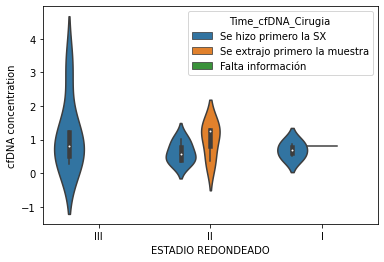

In [16]:
sns.violinplot(data=df_cfDNA, x="ESTADIO REDONDEADO", y="cfDNA concentration", hue='Time_cfDNA_Cirugia')

<AxesSubplot:xlabel='TratamientoResumido', ylabel='cfDNA concentration'>

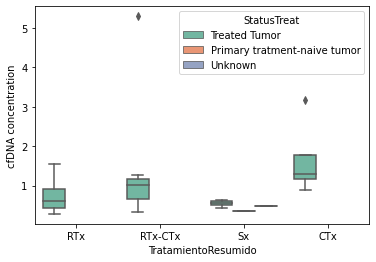

In [17]:
sns.boxplot(data=df_cfDNA, x="TratamientoResumido", y="cfDNA concentration", hue='StatusTreat',
           palette = 'Set2')

<AxesSubplot:xlabel='TratamientoResumido', ylabel='cfDNA concentration'>

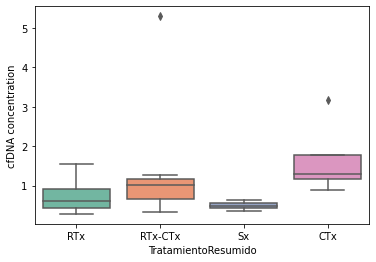

In [18]:
sns.boxplot(data=df_cfDNA, x="TratamientoResumido", y="cfDNA concentration",
           palette = 'Set2')

<AxesSubplot:xlabel='StatusTreat', ylabel='cfDNA concentration'>

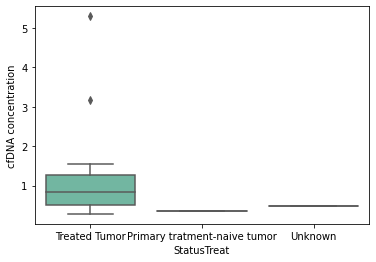

In [19]:
sns.boxplot(data=df_cfDNA, x="StatusTreat", y="cfDNA concentration",
           palette = 'Set2')

# Estadistics

In [20]:
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy import stats

### Shapiro Wilk
$H_o$ : muestra proviene de una distribución normal

In [21]:
def shapiro_test_df(df,columna):
    print(columna)
    df_i = df.dropna(subset=[columna])
    for i in df_i[columna].unique():
        print('shapiro test: ' , i)
        df_icf = df[df[columna] == i]
        if len(df_icf)>=3:
            concentration_i = list(df_icf['cfDNA concentration'])
            print(shapiro(concentration_i))
        else:
            print('No se puede realizar el estadistico')
shapiro_test_df(df_cfDNA,'ESTADIO REDONDEADO')
print('\n')
shapiro_test_df(df_cfDNA,'TratamientoResumido')
print('\n')
shapiro_test_df(df_cfDNA,'TratamientoDetallado')

ESTADIO REDONDEADO
shapiro test:  III
ShapiroResult(statistic=0.7974217534065247, pvalue=0.05571027472615242)
shapiro test:  II
ShapiroResult(statistic=0.8732447028160095, pvalue=0.198110893368721)
shapiro test:  I
ShapiroResult(statistic=0.882640540599823, pvalue=0.33219894766807556)


TratamientoResumido
shapiro test:  RTx
ShapiroResult(statistic=0.8894143104553223, pvalue=0.38040295243263245)
shapiro test:  RTx-CTx
ShapiroResult(statistic=0.6402621269226074, pvalue=0.0007972685853019357)
shapiro test:  Sx
ShapiroResult(statistic=0.9869723916053772, pvalue=0.9680545926094055)
shapiro test:  CTx
ShapiroResult(statistic=0.7924115657806396, pvalue=0.08929301798343658)


TratamientoDetallado
shapiro test:  RTX
ShapiroResult(statistic=0.8894143104553223, pvalue=0.38040295243263245)
shapiro test:  RTX-NAC
ShapiroResult(statistic=0.9339186549186707, pvalue=0.617617130279541)
shapiro test:  SX
ShapiroResult(statistic=0.9869723916053772, pvalue=0.9680545926094055)
shapiro test:  RTX-AC
Shapir

### levene test
$H_o$: Varianzas poblacionales homogeneas

In [22]:
lst = df_cfDNA[df_cfDNA['TratamientoResumido']=='CTx']['cfDNA concentration'] 
lst0 = df_cfDNA[df_cfDNA['TratamientoResumido']=='RTx']['cfDNA concentration'] 
lst1 = df_cfDNA[df_cfDNA['TratamientoResumido']=='RTx-CTx']['cfDNA concentration'] 
lst2 = df_cfDNA[df_cfDNA['TratamientoResumido']=='Sx']['cfDNA concentration'] 
levene(lst, lst0, lst1, lst2)

LeveneResult(statistic=0.5901265025465392, pvalue=0.6303294494343181)

### ANOVA
Distribución parametrica

$H_o$: No existe diferencia entre los grupos o medias

In [23]:
lst3 = df_cfDNA[df_cfDNA['ESTADIO REDONDEADO']=='I']['cfDNA concentration'] 
lst4 = df_cfDNA[df_cfDNA['ESTADIO REDONDEADO']=='II']['cfDNA concentration'] 
lst5 = df_cfDNA[df_cfDNA['ESTADIO REDONDEADO']=='III']['cfDNA concentration'] 

In [24]:
f_oneway(lst3, lst4, lst5)

F_onewayResult(statistic=0.5157210303650301, pvalue=0.6087889941906356)

In [25]:
lst6 = df_cfDNA[df_cfDNA['TratamientoDetallado']=='RTX-AC']['cfDNA concentration'] 
lst7 = df_cfDNA[df_cfDNA['TratamientoDetallado']=='RTX-NAC']['cfDNA concentration'] 
lst8 = df_cfDNA[df_cfDNA['TratamientoDetallado']=='SX']['cfDNA concentration'] 
lst9 = df_cfDNA[df_cfDNA['TratamientoDetallado']=='RTX']['cfDNA concentration'] 

In [26]:
f_oneway(lst6, lst7, lst8, lst9)

F_onewayResult(statistic=0.93576107657424, pvalue=0.45358972701281064)

### Krustal Walis
Distribución no paramterica

$H_o$: No existe diferencia entre los grupos o medias

In [27]:
stats.kruskal(lst, lst0, lst1, lst2)

KruskalResult(statistic=7.143483284961835, pvalue=0.06746239781344408)

# Coeficiente de correlación de Pearson

In [28]:
df_cfDNA['ESTADIO NUMERICO'] = df_cfDNA['ESTADIO REDONDEADO'].replace({'I': 1, 
                           'II': 2, 
                            'III': 3})

/tmp/ipykernel_42862/507085948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cfDNA['ESTADIO NUMERICO'] = df_cfDNA['ESTADIO REDONDEADO'].replace({'I': 1,


In [29]:
df_cfDNA_i = df_cfDNA.dropna(subset=['ESTADIO NUMERICO'])
stats.pearsonr(df_cfDNA_i['ESTADIO NUMERICO'], df_cfDNA_i['cfDNA concentration'])

(0.2461662444045915, 0.3580714343511643)

# Plot Final

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv('/home/fer/FinalDataBase_TimeTreat.csv')
df_cfDNA = df[df['cfDNA concentration']!='No aplica']
df_cfDNA.head()

,ID_Final,ID_Tumor_Ernest,ID_Colombia,cfDNA concentration,ctDNA_ichor,Fecha toma de muestra tejido,Fecha toma de muestra plasma,Fecha de Patología,RE,RP,...,TALLA (m),IMC (kg/m)^2,Time_Tejido_Cirugia,Time_cfDNA_Cirugia,Time_Tejido_QX,Time_cfDNA_QX,Time_Tejido_RXT,Time_cfDNA_RXT,StatusTreat_cfDNA,StatusTreat_Tumor
0,UEB-0205,5,51,0.81,0,8/12/2011 0:00,9/27/2011 0:00,9/27/2011 0:00,1,0.4,...,1.68,19.48696145,0.0,1.0,0.0,0.0,0.0,0.0,Treated Tumor,Primary tratment-naive tumor
1,UEB-0208,29,428,0.88,0.01832,3/16/2011 0:00,3/15/2011 0:00,4/15/2011 0:00,Positivo 80%,Negativo,...,1.55,24.14151925,0.0,0.0,0.0,0.0,NaN,NaN,Primary tratment-naive tumor,Primary tratment-naive tumor
2,UEB-0209,31,461,0.36,0.01756,5/20/2011 0:00,6/15/2011 0:00,5/20/2011 0:00,0.6,0.6,...,1.4,31.12244898,0.0,1.0,NaN,NaN,NaN,NaN,Treated Tumor,Primary tratment-naive tumor
3,UEB-0210,30,466,1.27,0.01458,5/13/2011 0:00,5/24/2011 0:00,5/13/2011 0:00,1,1,...,1.64,21.93634741,1.0,1.0,0.0,0.0,0.0,0.0,Treated Tumor,Treated Tumor
4,UEB-0211,33,469,1.07,0.02001,7/6/2011 0:00,4/26/2011 0:00,2/22/2011 0:00,1,1,...,1.56,29.58579882,0.0,0.0,1.0,1.0,0.0,0.0,Treated Tumor,Treated Tumor


In [27]:
df_cfDNA.columns.values

array(['ID_Final', 'ID_Tumor_Ernest', 'ID_Colombia',
       'cfDNA concentration', 'ctDNA_ichor',
       'Fecha toma de muestra tejido', 'Fecha toma de muestra plasma',
       'Fecha de Patología', 'RE', 'RP', 'Her2', 'Ki67', 'Fenotipo',
       'DIAGNOSTICO HISTOPATOLOGICO', 'Histopatologic', 'T', 'N', 'M',
       'ESTADIO INICIAL', 'ESTADIO ARREGLADO', 'ESTADIO REDONDEADO',
       'SEXO', 'FECHA CIRUGIA', 'FECHA DE COMIENZO QX',
       'FECHA DE COMIENZO RXT', 'TRATAMIENTO', 'TratamientoDetallado',
       'TratamientoResumido', 'TIPO RXT', 'TIMING RXT', 'TIPO DE QX',
       'Nª CICLOS DE QX', 'RESPUESTA A QX', 'STATUS  VITAL',
       'ULTIMA FECHA CONOCIDA', 'FECHA DEFUNCION ', 'PROGRESION TUMORAL',
       'UTIMA FECHA INFORMACION', 'EDAD', 'FAMILIAR CON CANCER',
       'PESO  (Kg)', 'TALLA (m)', 'IMC (kg/m)^2', 'Time_Tejido_Cirugia',
       'Time_cfDNA_Cirugia', 'Time_Tejido_QX', 'Time_cfDNA_QX',
       'Time_Tejido_RXT', 'Time_cfDNA_RXT', 'StatusTreat_cfDNA',
       'StatusTreat_Tum

In [4]:
df_cfDNA['cfDNA concentration'] = list(map(float, df_cfDNA['cfDNA concentration']))
df_cfDNA['ctDNA_ichor'] = list(map(float, df_cfDNA['ctDNA_ichor']))

/tmp/ipykernel_5040/3321842884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cfDNA['cfDNA concentration'] = list(map(float, df_cfDNA['cfDNA concentration']))
/tmp/ipykernel_5040/3321842884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cfDNA['ctDNA_ichor'] = list(map(float, df_cfDNA['ctDNA_ichor']))


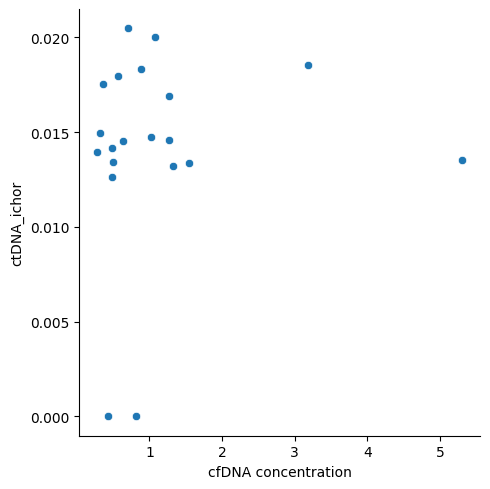

In [19]:
sns.relplot(x = "cfDNA concentration", y = "ctDNA_ichor", data = df_cfDNA)

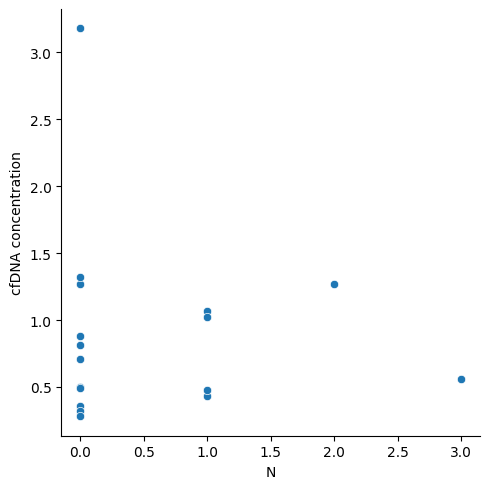

In [6]:
sns.relplot(x = "N", y = "cfDNA concentration", data = df_cfDNA)

In [100]:
a, b, c, d = np.polyfit(df_cfDNA['EDAD'], df_cfDNA['cfDNA concentration'], 3)
residuals =  df_cfDNA['cfDNA concentration'] - (a*df_cfDNA['EDAD']**3 + b*df_cfDNA['EDAD']**2 + c*df_cfDNA['EDAD'] + d)
residuals

20   -1.393281
6    -0.494468
2    -1.088813
15   -0.281371
21   -0.601727
12   -0.166125
9     0.058168
8    -0.460437
19   -0.808813
16   -0.717877
0    -0.103667
1    -0.472762
17   -0.327050
4     0.386405
14    0.613875
3    -0.082762
13    0.177604
7     0.866405
11    1.024573
10    3.872123
dtype: float64

In [102]:
df_res = pd.DataFrame(residuals)
df_res.mean()

0    2.142730e-14
dtype: float64

[Text(0, 0.5, 'Concentration (ng/μl)'), Text(0.5, 0, 'Age')]

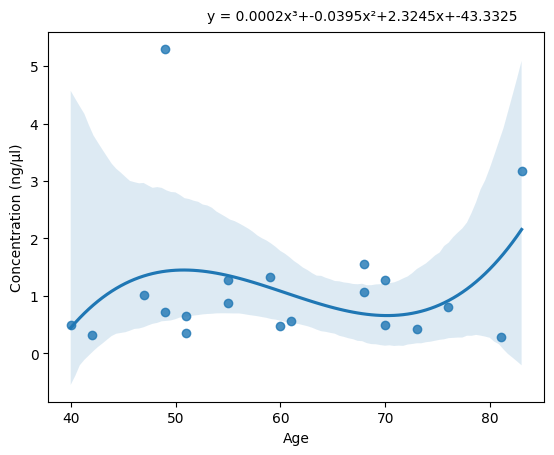

In [78]:
ax = sns.regplot(x = "EDAD", y = "cfDNA concentration", data = df_cfDNA, order = 3)
plt.text(53, 5.8, 'y = '+ str(round(a, 4))+'x³+' + str(round(b, 4))+'x²+'+ str(round(c, 4))+'x+'+ str(round(d, 4)), 
         horizontalalignment='left', size='medium', color='black')
ax.set(ylabel = "Concentration (ng/μl)", xlabel = "Age")

In [111]:
model = np.poly1d(np.polyfit(df_cfDNA['EDAD'], df_cfDNA['cfDNA concentration'], 3))
model

poly1d([ 2.17441630e-04, -3.94502408e-02,  2.32446245e+00, -4.33325454e+01])

In [32]:
df_treat = df_cfDNA[df_cfDNA['StatusTreat_cfDNA']=='Treated Tumor']

In [44]:
df_I = df_cfDNA[df_cfDNA['ESTADIO REDONDEADO']=='I']
df_II = df_cfDNA[df_cfDNA['ESTADIO REDONDEADO']=='II']
df_III = df_cfDNA[df_cfDNA['ESTADIO REDONDEADO']=='III']
df_I

,ID_Final,ID_Tumor_Ernest,ID_Colombia,cfDNA concentration,ctDNA_ichor,Fecha toma de muestra tejido,Fecha toma de muestra plasma,Fecha de Patología,RE,RP,...,TALLA (m),IMC (kg/m)^2,Time_Tejido_Cirugia,Time_cfDNA_Cirugia,Time_Tejido_QX,Time_cfDNA_QX,Time_Tejido_RXT,Time_cfDNA_RXT,StatusTreat_cfDNA,StatusTreat_Tumor
0,UEB-0205,5,51,0.81,0.00000,8/12/2011 0:00,9/27/2011 0:00,9/27/2011 0:00,1,0.4,...,1.68,19.48696145,0.0,1.0,0.0,0.0,0.0,0.0,Treated Tumor,Primary tratment-naive tumor
1,UEB-0208,29,428,0.88,0.01832,3/16/2011 0:00,3/15/2011 0:00,4/15/2011 0:00,Positivo 80%,Negativo,...,1.55,24.14151925,0.0,0.0,0.0,0.0,NaN,NaN,Primary tratment-naive tumor,Primary tratment-naive tumor
9,UEB-0216,51,1774,0.50,0.01342,9/18/2013 0:00,9/16/2013 0:00,3/26/2013 0:00,1,1,...,1.59,21.75546853,0.0,0.0,0.0,0.0,0.0,0.0,Primary tratment-naive tumor,Primary tratment-naive tumor


<AxesSubplot:xlabel='EDAD', ylabel='cfDNA concentration'>

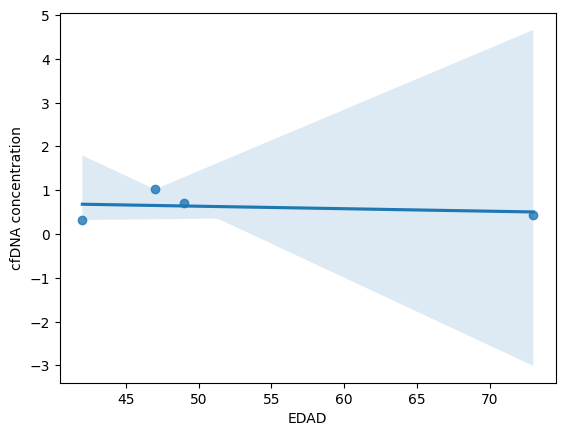

In [64]:
df_II_prim = df_II[df_II['StatusTreat_cfDNA']=='Primary tratment-naive tumor']
df_II_treat = df_II[df_II['StatusTreat_cfDNA']=='Treated Tumor']

sns.regplot(x = "EDAD", y = "cfDNA concentration", data = df_II_prim, order = 1)

<AxesSubplot:xlabel='EDAD', ylabel='cfDNA concentration'>

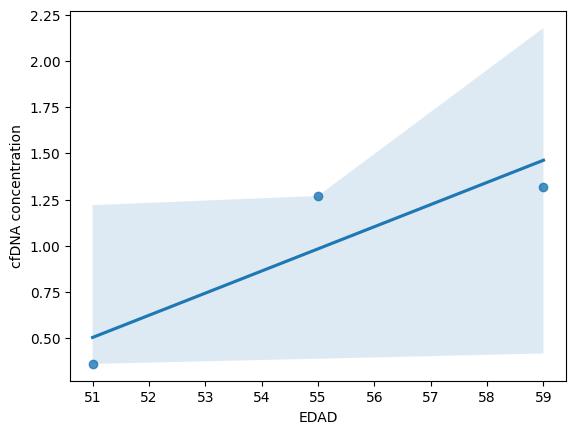

In [65]:
sns.regplot(x = "EDAD", y = "cfDNA concentration", data = df_II_treat, order = 1)

/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/

/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/

<AxesSubplot:xlabel='EDAD', ylabel='cfDNA concentration'>

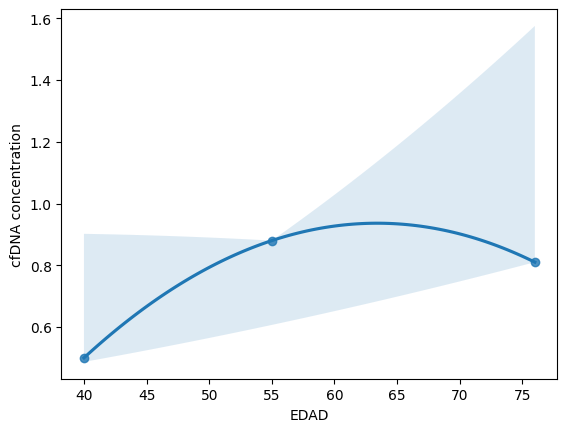

In [52]:
sns.regplot(x = "EDAD", y = "cfDNA concentration", data = df_I, order = 2)

/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))


<AxesSubplot:xlabel='EDAD', ylabel='cfDNA concentration'>

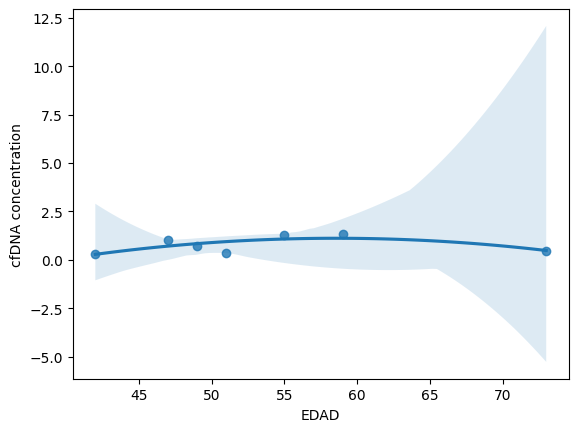

In [50]:
sns.regplot(x = "EDAD", y = "cfDNA concentration", data = df_II, order = 2)

/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/fer/

/home/fer/.local/lib/python3.10/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))


<AxesSubplot:xlabel='EDAD', ylabel='cfDNA concentration'>

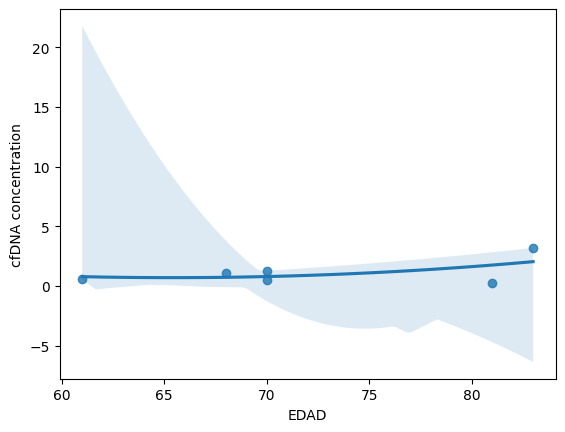

In [51]:
sns.regplot(x = "EDAD", y = "cfDNA concentration", data = df_III, order = 2)

<AxesSubplot:xlabel='TratamientoResumido', ylabel='cfDNA concentration'>

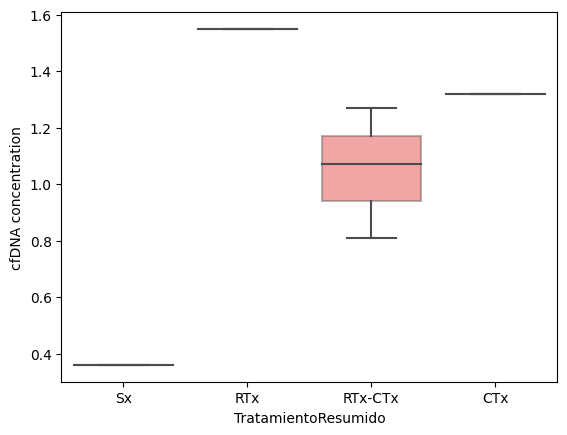

In [35]:
palette = {'I':'blue', 'II':'blue', 'III':'blue', "CTx":"red",
           "RTx":"red","RTx-CTx":"red","Sx":"red", 'Treated Tumor':'red', 
           'Primary tratment-naive tumor':'blue', 'Unknown':'#DCDFE7'}

sns.boxplot(data=df_treat, x='TratamientoResumido', showfliers = False, boxprops={'alpha': 0.4},
            y='cfDNA concentration', palette = palette, order=['Sx', 'RTx', 'RTx-CTx', 'CTx'])

In [81]:
df_cfDNA = df_cfDNA.sort_values(['cfDNA concentration'])
df_cfDNA.rename(columns = {'StatusTreat_cfDNA':'TumorType'}, inplace = True)

In [82]:
df_cfDNA['cfDNA concentration'] = list(map(float, df_cfDNA['cfDNA concentration']))

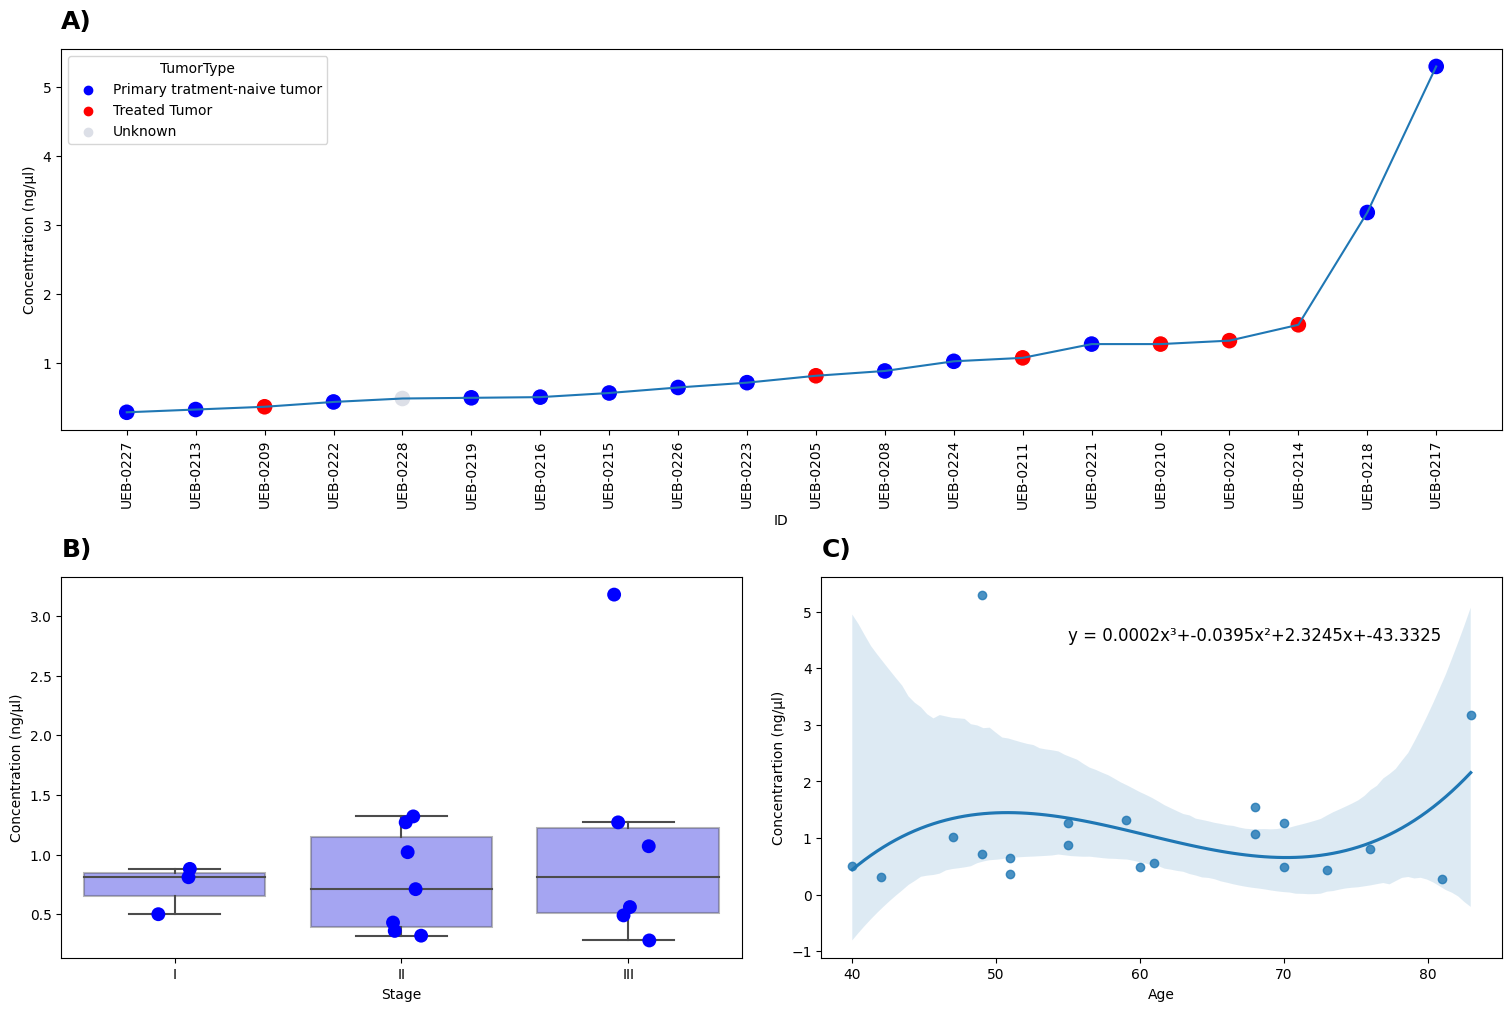

In [99]:
#fig, axes = plt.subplots(2, 2, figsize=(18, 13))
axd = plt.figure(constrained_layout=True, figsize=(15, 10)).subplot_mosaic(
    """
    AA
    BC
    """)
#fig.suptitle('cfDNA concentration', size = 20)
palette = {'I':'blue', 'II':'blue', 'III':'blue', "CTx":"red",
           "RTx":"red","RTx-CTx":"red","Sx":"red", 'Treated Tumor':'red', 
           'Primary tratment-naive tumor':'blue', 'Unknown':'#DCDFE7'}
            
sns.lineplot(ax = axd['A'], data=df_cfDNA, x="ID_Final", y="cfDNA concentration", palette=['gray'])
sns.scatterplot(ax = axd['A'], data=df_cfDNA, x="ID_Final", y="cfDNA concentration", s=150, 
                hue = 'TumorType', palette=palette)

axd['A'].set(ylabel = "Concentration (ng/μl)", xlabel = "ID")
axd['A'].tick_params(axis='x', rotation=90)
#axd['A'].axhline(2, ls='--', c='red')
#axd['A'].axvline('UEB-0218', ls='--', c='purple')
axd['A'].set_title('A)', weight='bold', size = 18, loc='left', pad=15)



sns.boxplot(ax = axd['B'], data=df_cfDNA, x='ESTADIO REDONDEADO', showfliers = False, order = ['I', 'II', 'III'],
            y='cfDNA concentration',palette = palette, boxprops={'alpha': 0.4})

sns.stripplot(ax = axd['B'], data=df_cfDNA, palette = palette, x='ESTADIO REDONDEADO', size = 10, order = ['I', 'II', 'III'],
              y='cfDNA concentration')

axd['B'].set(xlabel = "Stage", ylabel = "Concentration (ng/μl)")
axd['B'].set_title('B)', weight='bold', size = 18, loc='left', pad=15)



sns.regplot(ax = axd['C'], x = "EDAD", y = "cfDNA concentration", data = df_cfDNA, order = 3)
plt.text(55, 4.5, 'y = '+ str(round(a, 4))+'x³+' + str(round(b, 4))+'x²+'+ str(round(c, 4))+'x+'+ str(round(d, 4)), 
         horizontalalignment='left', size=12, color='black')
ax.set(ylabel = "Concentration (ng/μl)", xlabel = "Age")

axd['C'].set(xlabel = "Age", ylabel = "Concentrartion (ng/μl)")
axd['C'].set_title('C)', weight='bold', size = 18, loc='left', pad=15)







#sns.regplot(ax = axes[1,0], x="ESTADIO NUMERICO", y="cfDNA concentration", data=df_cfDNA)
#axes[1,0].set(xlabel = "Stage", ylabel = "Concentrartion (ng/μl)")
#axes[1,0].set(xticks=np.arange(1,4,1))
#axes[1,0].set_xticklabels(['I', 'II', 'III'])
#axes[1,0].set_title('c)', weight='bold', size = 18, loc='left', pad=15)



plt.savefig('/home/fer/Concentration_v2.pdf', dpi=300)

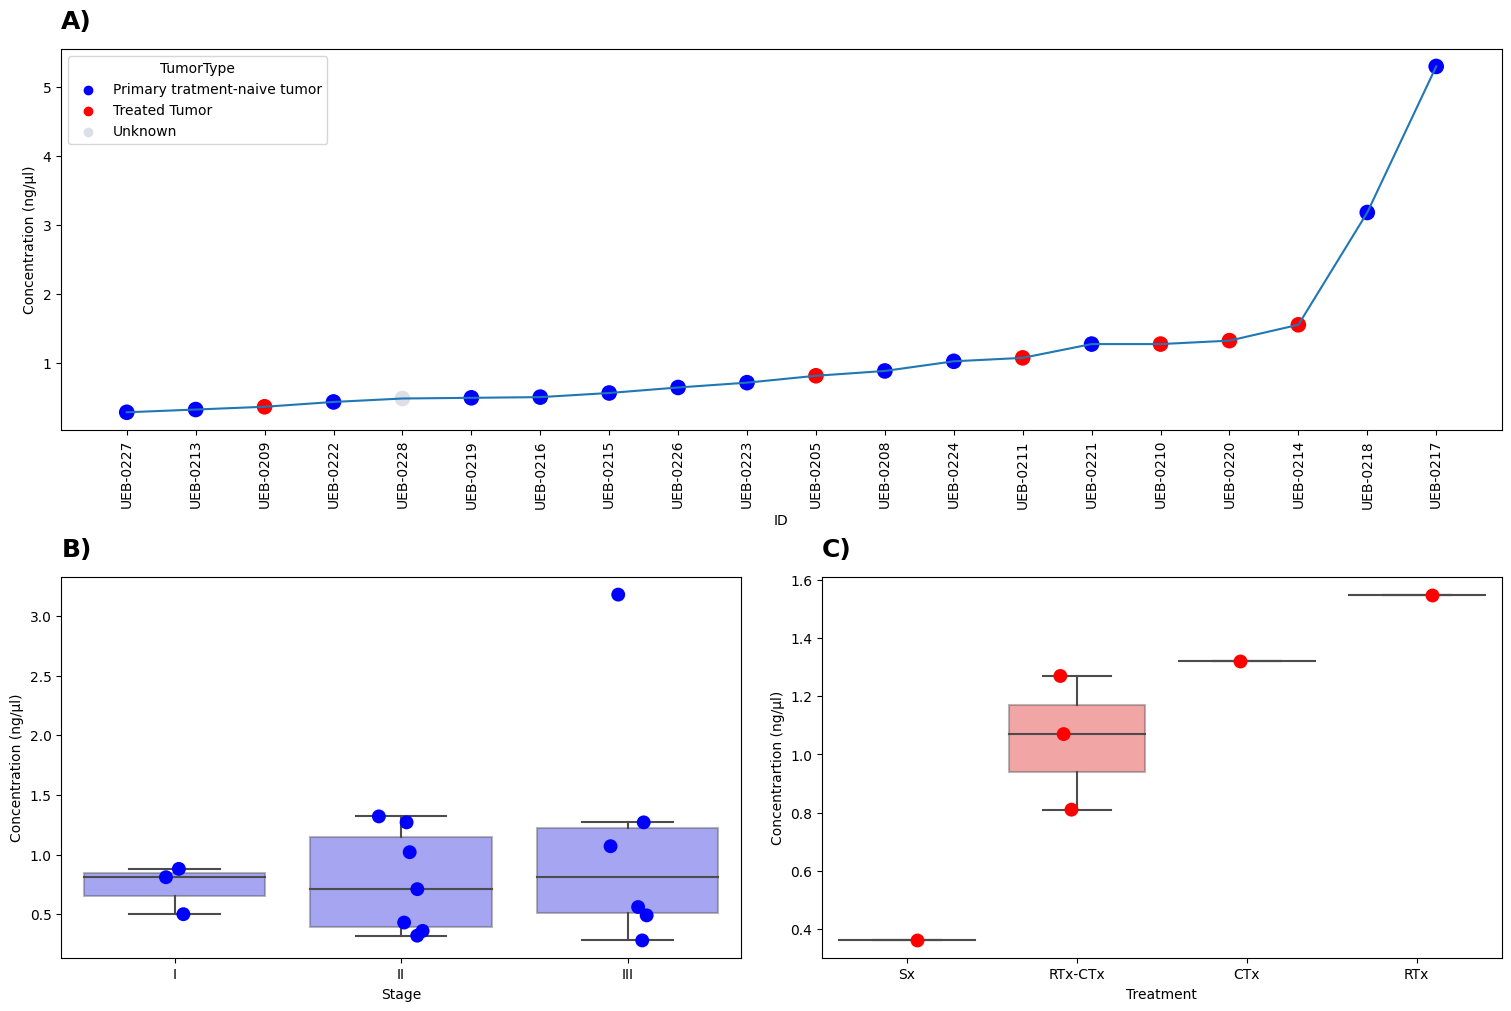

In [98]:
#fig, axes = plt.subplots(2, 2, figsize=(18, 13))
axd = plt.figure(constrained_layout=True, figsize=(15, 10)).subplot_mosaic(
    """
    AA
    BC
    """)
#fig.suptitle('cfDNA concentration', size = 20)
palette = {'I':'blue', 'II':'blue', 'III':'blue', "CTx":"red",
           "RTx":"red","RTx-CTx":"red","Sx":"red", 'Treated Tumor':'red', 
           'Primary tratment-naive tumor':'blue', 'Unknown':'#DCDFE7'}
            
sns.lineplot(ax = axd['A'], data=df_cfDNA, x="ID_Final", y="cfDNA concentration", palette=['gray'])
sns.scatterplot(ax = axd['A'], data=df_cfDNA, x="ID_Final", y="cfDNA concentration", s=150, 
                hue = 'TumorType', palette=palette)

axd['A'].set(ylabel = "Concentration (ng/μl)", xlabel = "ID")
axd['A'].tick_params(axis='x', rotation=90)
#axd['A'].axhline(2, ls='--', c='red')
#axd['A'].axvline('UEB-0218', ls='--', c='purple')
axd['A'].set_title('A)', weight='bold', size = 18, loc='left', pad=15)



sns.boxplot(ax = axd['B'], data=df_cfDNA, x='ESTADIO REDONDEADO', showfliers = False, order = ['I', 'II', 'III'],
            y='cfDNA concentration',palette = palette, boxprops={'alpha': 0.4})

sns.stripplot(ax = axd['B'], data=df_cfDNA, palette = palette, x='ESTADIO REDONDEADO', size = 10, order = ['I', 'II', 'III'],
              y='cfDNA concentration')

axd['B'].set(xlabel = "Stage", ylabel = "Concentration (ng/μl)")
axd['B'].set_title('B)', weight='bold', size = 18, loc='left', pad=15)




sns.boxplot(ax = axd['C'],data=df_treat, x='TratamientoResumido', showfliers = False, boxprops={'alpha': 0.4},
            y='cfDNA concentration', palette = palette, order=['Sx',  'RTx-CTx', 'CTx', 'RTx'])

sns.stripplot(ax = axd['C'],data=df_treat, x='TratamientoResumido', size = 10,
              y='cfDNA concentration', palette = palette, order=['Sx', 'RTx-CTx', 'CTx','RTx'])

axd['C'].set(xlabel = "Treatment", ylabel = "Concentrartion (ng/μl)")
axd['C'].set_title('C)', weight='bold', size = 18, loc='left', pad=15)




#sns.regplot(ax = axes[1,0], x="ESTADIO NUMERICO", y="cfDNA concentration", data=df_cfDNA)
#axes[1,0].set(xlabel = "Stage", ylabel = "Concentrartion (ng/μl)")
#axes[1,0].set(xticks=np.arange(1,4,1))
#axes[1,0].set_xticklabels(['I', 'II', 'III'])
#axes[1,0].set_title('c)', weight='bold', size = 18, loc='left', pad=15)



plt.savefig('/home/fer/Concentration_v1.pdf', dpi=300)

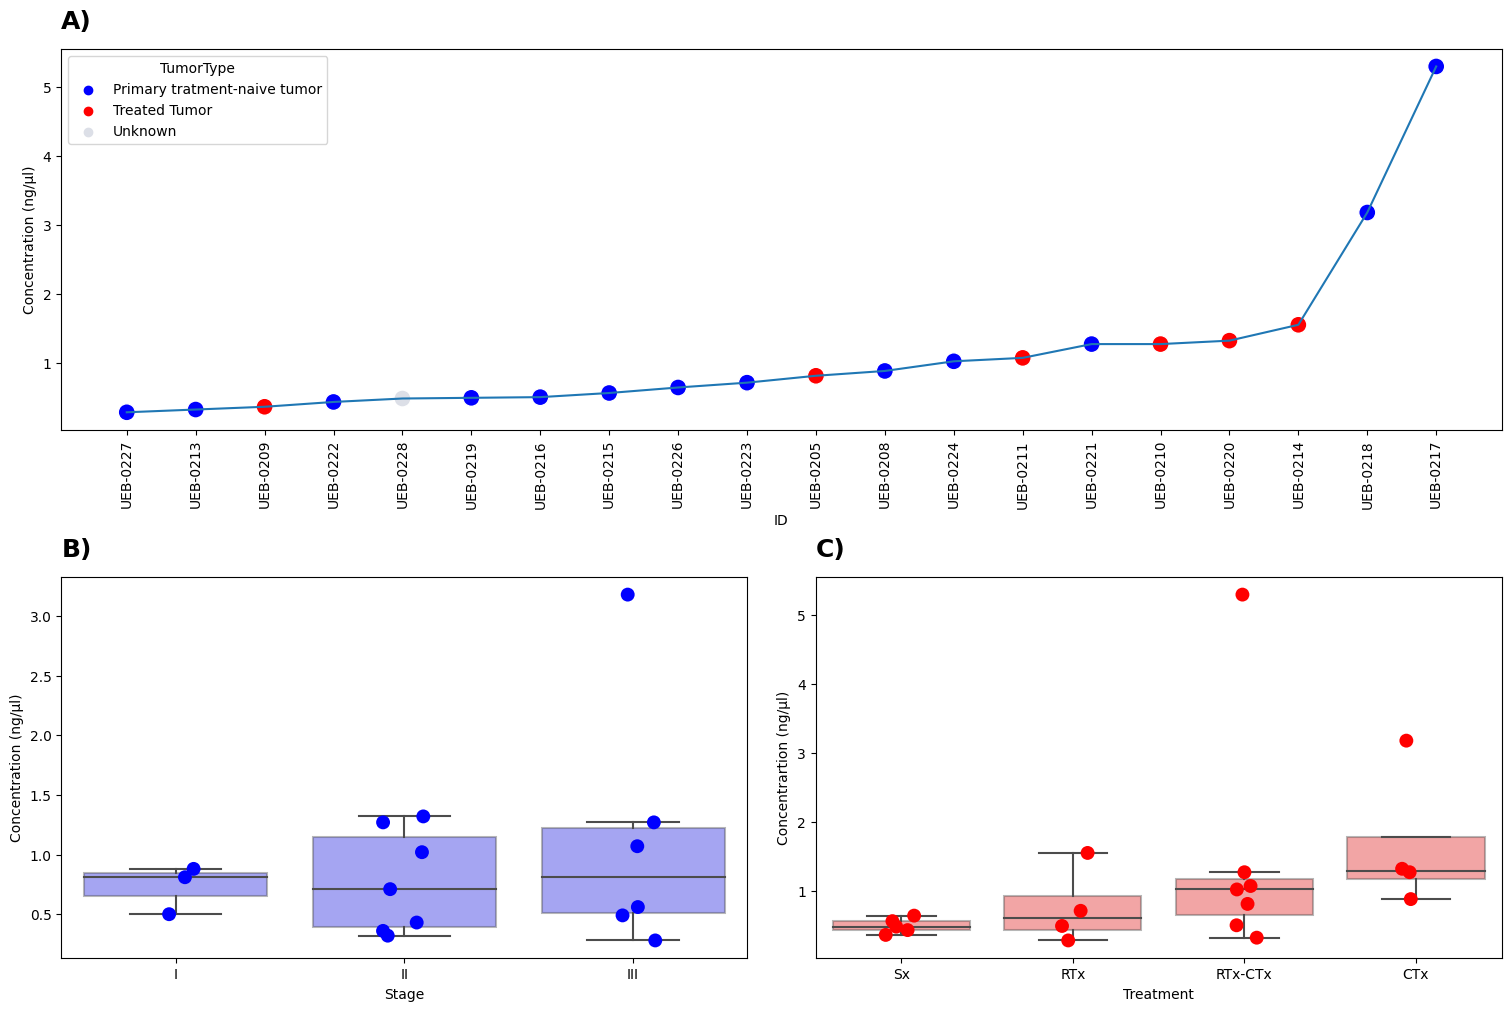

In [84]:
#fig, axes = plt.subplots(2, 2, figsize=(18, 13))
axd = plt.figure(constrained_layout=True, figsize=(15, 10)).subplot_mosaic(
    """
    AA
    BC
    """)
#fig.suptitle('cfDNA concentration', size = 20)
palette = {'I':'blue', 'II':'blue', 'III':'blue', "CTx":"red",
           "RTx":"red","RTx-CTx":"red","Sx":"red", 'Treated Tumor':'red', 
           'Primary tratment-naive tumor':'blue', 'Unknown':'#DCDFE7'}
            
sns.lineplot(ax = axd['A'], data=df_cfDNA, x="ID_Final", y="cfDNA concentration", palette=['gray'])
sns.scatterplot(ax = axd['A'], data=df_cfDNA, x="ID_Final", y="cfDNA concentration", s=150, 
                hue = 'TumorType', palette=palette)

axd['A'].set(ylabel = "Concentration (ng/μl)", xlabel = "ID")
axd['A'].tick_params(axis='x', rotation=90)
#axd['A'].axhline(2, ls='--', c='red')
#axd['A'].axvline('UEB-0218', ls='--', c='purple')
axd['A'].set_title('A)', weight='bold', size = 18, loc='left', pad=15)



sns.boxplot(ax = axd['B'], data=df_cfDNA, x='ESTADIO REDONDEADO', showfliers = False, order = ['I', 'II', 'III'],
            y='cfDNA concentration',palette = palette, boxprops={'alpha': 0.4})

sns.stripplot(ax = axd['B'], data=df_cfDNA, palette = palette, x='ESTADIO REDONDEADO', size = 10, order = ['I', 'II', 'III'],
              y='cfDNA concentration')

axd['B'].set(xlabel = "Stage", ylabel = "Concentration (ng/μl)")
axd['B'].set_title('B)', weight='bold', size = 18, loc='left', pad=15)




sns.boxplot(ax = axd['C'],data=df_cfDNA, x='TratamientoResumido', showfliers = False, boxprops={'alpha': 0.4},
            y='cfDNA concentration', palette = palette, order=['Sx', 'RTx', 'RTx-CTx', 'CTx'])

sns.stripplot(ax = axd['C'],data=df_cfDNA, x='TratamientoResumido', size = 10,
              y='cfDNA concentration', palette = palette, order=['Sx', 'RTx', 'RTx-CTx', 'CTx'])

axd['C'].set(xlabel = "Treatment", ylabel = "Concentrartion (ng/μl)")
axd['C'].set_title('C)', weight='bold', size = 18, loc='left', pad=15)




#sns.regplot(ax = axes[1,0], x="ESTADIO NUMERICO", y="cfDNA concentration", data=df_cfDNA)
#axes[1,0].set(xlabel = "Stage", ylabel = "Concentrartion (ng/μl)")
#axes[1,0].set(xticks=np.arange(1,4,1))
#axes[1,0].set_xticklabels(['I', 'II', 'III'])
#axes[1,0].set_title('c)', weight='bold', size = 18, loc='left', pad=15)



plt.savefig('/home/fer/Concentration.pdf', dpi=300)

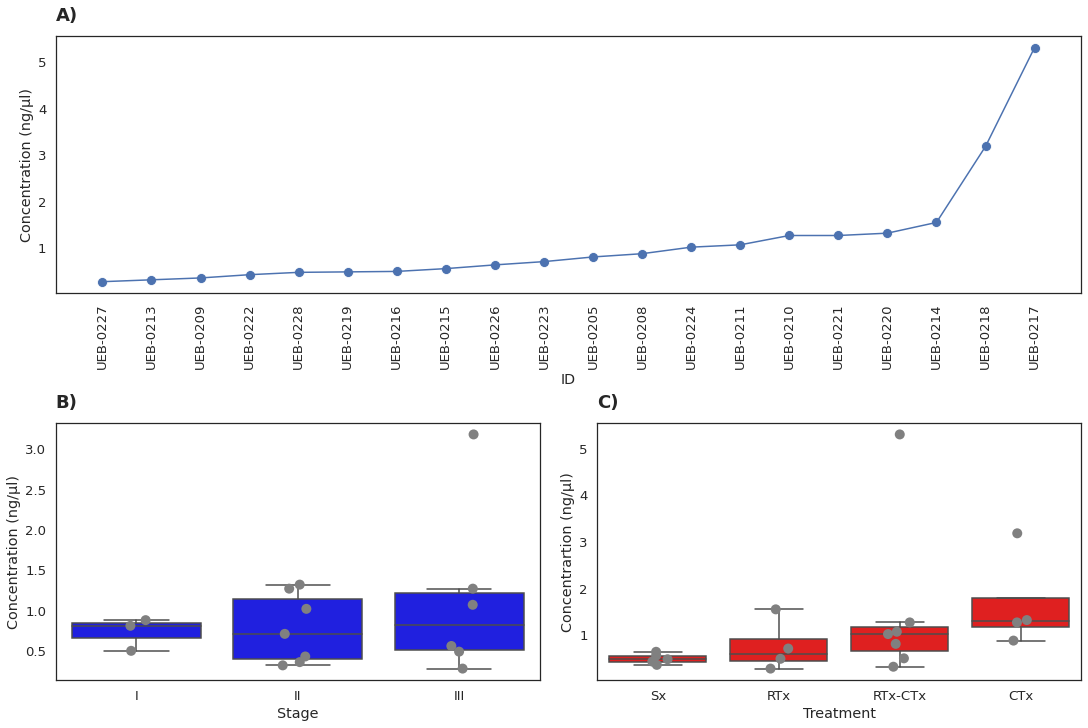

In [45]:
#fig, axes = plt.subplots(2, 2, figsize=(18, 13))
axd = plt.figure(constrained_layout=True, figsize=(15, 10)).subplot_mosaic(
    """
    AA
    BC
    """)
#fig.suptitle('cfDNA concentration', size = 20)
palette = {'I':'blue', 'II':'blue', 'III':'blue', "CTx":"red",
           "RTx":"red","RTx-CTx":"red","Sx":"red"}
            
sns.lineplot(ax = axd['A'], data=df_cfDNA, x="ID_Final", y="cfDNA concentration", palette=['gray'])
sns.scatterplot(ax = axd['A'], data=df_cfDNA, x="ID_Final", y="cfDNA concentration", s=100)


axd['A'].set(ylabel = "Concentration (ng/μl)", xlabel = "ID")
axd['A'].tick_params(axis='x', rotation=90)
#axd['A'].axhline(2, ls='--', c='red')
#axd['A'].axvline('UEB-0218', ls='--', c='purple')
axd['A'].set_title('A)', weight='bold', size = 18, loc='left', pad=15)



sns.boxplot(ax = axd['B'], data=df_cfDNA, x='ESTADIO REDONDEADO', showfliers = False, order = ['I', 'II', 'III'],
            y='cfDNA concentration',palette = palette)

sns.stripplot(ax = axd['B'], data=df_cfDNA, x='ESTADIO REDONDEADO', size = 10, order = ['I', 'II', 'III'],
              y='cfDNA concentration', palette=['gray'])

axd['B'].set(xlabel = "Stage", ylabel = "Concentration (ng/μl)")
axd['B'].set_title('B)', weight='bold', size = 18, loc='left', pad=15)




sns.boxplot(ax = axd['C'],data=df_cfDNA, x='TratamientoResumido', showfliers = False,
            y='cfDNA concentration', palette = palette, order=['Sx', 'RTx', 'RTx-CTx', 'CTx'])

sns.stripplot(ax = axd['C'],data=df_cfDNA, x='TratamientoResumido', size = 10,
              y='cfDNA concentration', palette=['gray'], order=['Sx', 'RTx', 'RTx-CTx', 'CTx'])

axd['C'].set(xlabel = "Treatment", ylabel = "Concentrartion (ng/μl)")
axd['C'].set_title('C)', weight='bold', size = 18, loc='left', pad=15)




#sns.regplot(ax = axes[1,0], x="ESTADIO NUMERICO", y="cfDNA concentration", data=df_cfDNA)
#axes[1,0].set(xlabel = "Stage", ylabel = "Concentrartion (ng/μl)")
#axes[1,0].set(xticks=np.arange(1,4,1))
#axes[1,0].set_xticklabels(['I', 'II', 'III'])
#axes[1,0].set_title('c)', weight='bold', size = 18, loc='left', pad=15)



plt.savefig('/home/fer/Concentration.pdf', dpi=300)

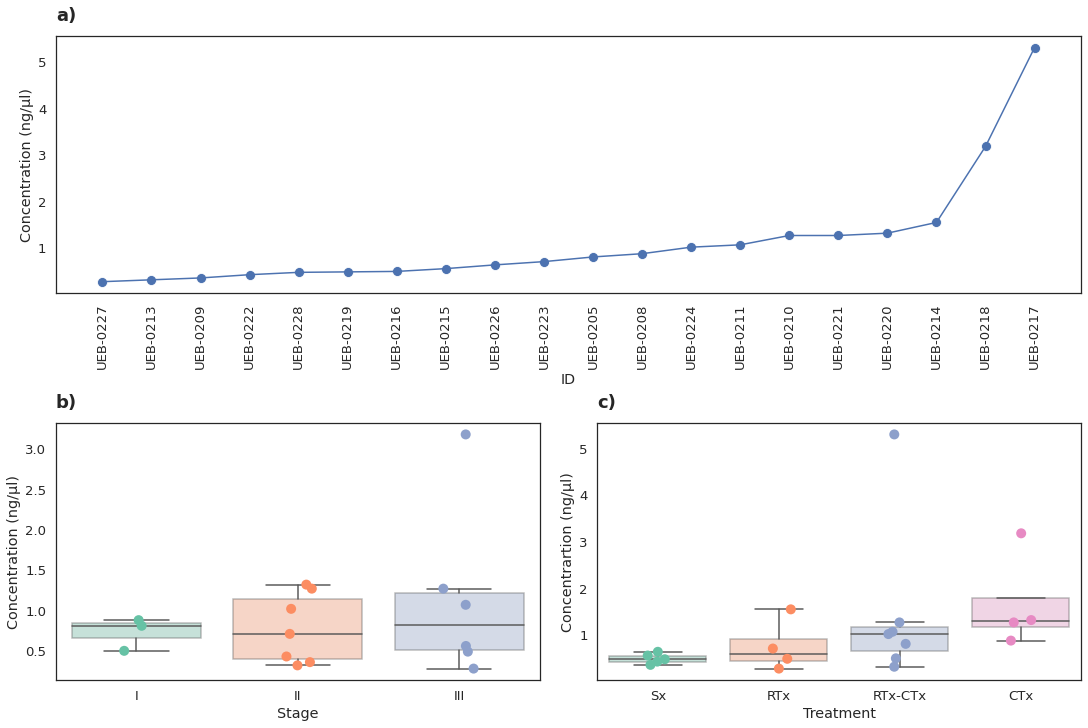

In [37]:

#sns.set_theme(style="white", palette="pastel")
sns.set(font_scale=1.2, style="white")
axd = plt.figure(constrained_layout=True, figsize=(15, 10)).subplot_mosaic(
    """
    AA
    BC
    """)
#fig.suptitle('cfDNA concentration', size = 20)
palette = {'I':'blue', 'II':'blue', 'III':'blue', "CTx":"red",
           "RTx":"red","RTx-CTx":"red","Sx":"red"}
            
sns.lineplot(ax = axd['A'], data=df_cfDNA, x="ID_Final", y="cfDNA concentration")
sns.scatterplot(ax = axd['A'], data=df_cfDNA, x="ID_Final", y="cfDNA concentration", s=100, palette = palette)

axd['A'].set(ylabel = "Concentration (ng/μl)", xlabel = "ID")
axd['A'].tick_params(axis='x', rotation=90)
#axd['A'].axhline(2, ls='--', c='red')
#axd['A'].axvline('UEB-0218', ls='--', c='purple')
axd['A'].set_title('a)', weight='bold', size = 18, loc='left', pad=15)



sns.boxplot(ax = axd['B'], data=df_cfDNA, x='ESTADIO REDONDEADO', showfliers = False, order = ['I', 'II', 'III'],
            y='cfDNA concentration',palette = 'Set2', boxprops={'alpha': 0.4})

sns.stripplot(ax = axd['B'], data=df_cfDNA, palette = 'Set2', x='ESTADIO REDONDEADO', size = 10, order = ['I', 'II', 'III'],
              y='cfDNA concentration')

axd['B'].set(xlabel = "Stage", ylabel = "Concentration (ng/μl)")
axd['B'].set_title('b)', weight='bold', size = 18, loc='left', pad=15)




sns.boxplot(ax = axd['C'],data=df_cfDNA, x='TratamientoResumido', showfliers = False, boxprops={'alpha': 0.4},
            y='cfDNA concentration', palette = 'Set2', order=['Sx', 'RTx', 'RTx-CTx', 'CTx'])

sns.stripplot(ax = axd['C'],data=df_cfDNA, x='TratamientoResumido', size = 10,
              y='cfDNA concentration', palette = 'Set2', order=['Sx', 'RTx', 'RTx-CTx', 'CTx'])

axd['C'].set(xlabel = "Treatment", ylabel = "Concentrartion (ng/μl)")
axd['C'].set_title('c)', weight='bold', size = 18, loc='left', pad=15)




#sns.regplot(ax = axes[1,0], x="ESTADIO NUMERICO", y="cfDNA concentration", data=df_cfDNA)
#axes[1,0].set(xlabel = "Stage", ylabel = "Concentrartion (ng/μl)")
#axes[1,0].set(xticks=np.arange(1,4,1))
#axes[1,0].set_xticklabels(['I', 'II', 'III'])
#axes[1,0].set_title('c)', weight='bold', size = 18, loc='left', pad=15)



plt.savefig('/home/fer/Concentration.pdf', dpi=300)

Text(0.0, 1.0, 'd)')

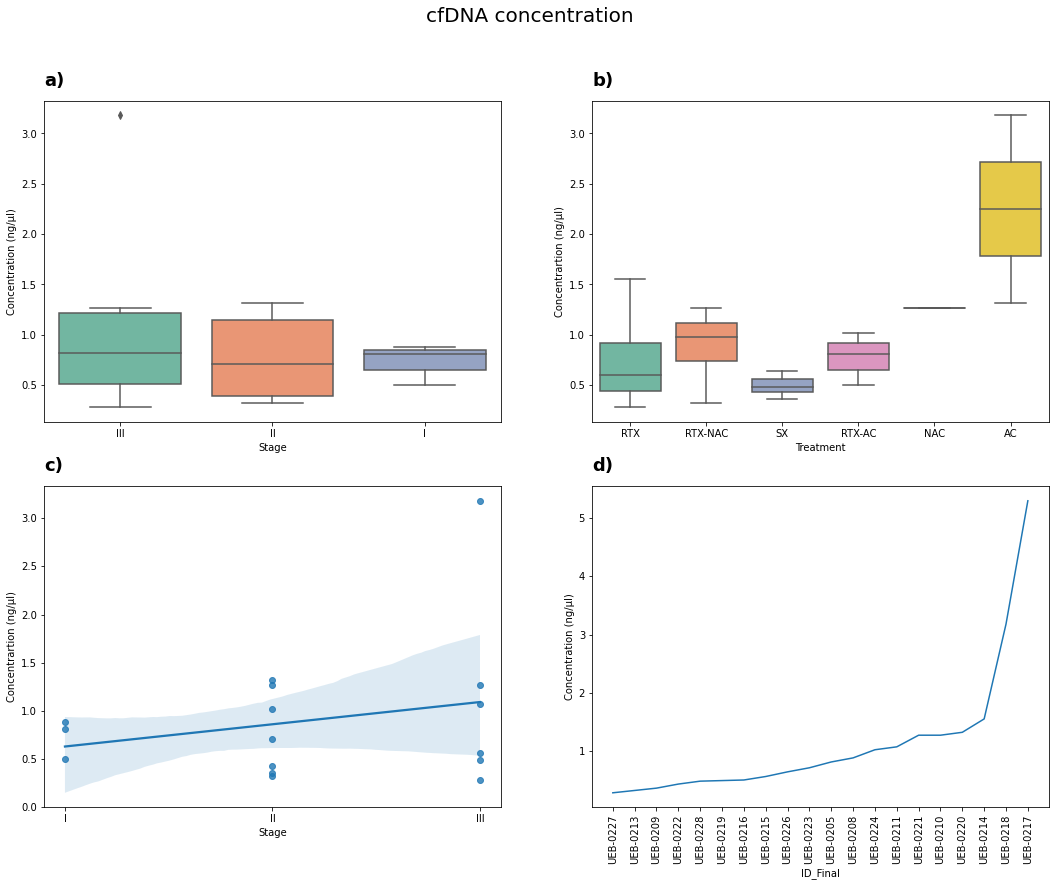

In [143]:
fig, axes = plt.subplots(2, 2, figsize=(18, 13))

fig.suptitle('cfDNA concentration', size = 20)

sns.boxplot(ax = axes[0,0], data=df_cfDNA, x='ESTADIO REDONDEADO', y='cfDNA concentration', palette = "Set2")
axes[0,0].set(xlabel = "Stage", ylabel = "Concentration (ng/μl)")
axes[0,0].set_title('a)', weight='bold', size = 18, loc='left', pad=15)

sns.boxplot(ax = axes[0,1],data=df_cfDNA, x='TratamientoDetallado', y='cfDNA concentration', palette = "Set2")
axes[0,1].set(xlabel = "Treatment", ylabel = "Concentrartion (ng/μl)")
axes[0,1].set_title('b)', weight='bold', size = 18, loc='left', pad=15)

sns.regplot(ax = axes[1,0], x="ESTADIO NUMERICO", y="cfDNA concentration", data=df_cfDNA)
axes[1,0].set(xlabel = "Stage", ylabel = "Concentrartion (ng/μl)")
axes[1,0].set(xticks=np.arange(1,4,1))
axes[1,0].set_xticklabels(['I', 'II', 'III'])
axes[1,0].set_title('c)', weight='bold', size = 18, loc='left', pad=15)

sns.lineplot(ax = axes[1,1], data=df_cfDNA, x="ID_Final", y="cfDNA concentration")
axes[1,1].set(ylabel = "Concentration (ng/μl)")
axes[1,1].tick_params(axis='x', rotation=90)
axes[1,1].set_title('d)', weight='bold', size = 18, loc='left', pad=15)

In [54]:
df_cfDNA['ctDNA_ichor'] = list(map(float,df_cfDNA['ctDNA_ichor'] ))
df_cfDNA  = df_cfDNA.sort_values('ctDNA_ichor')

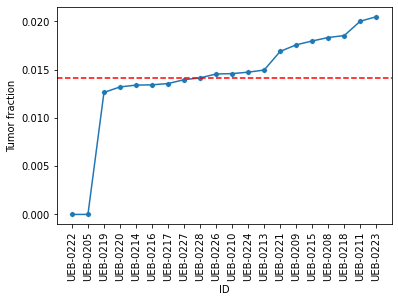

In [55]:

ax = sns.lineplot(data=df_cfDNA, x="ID_Final", y="ctDNA_ichor")
sns.scatterplot(data=df_cfDNA, x="ID_Final", y="ctDNA_ichor", s=30)

ax.set(ylabel = "Tumor fraction", xlabel = 'ID')
ax.tick_params(axis='x', rotation=90)
ax.axhline(df_cfDNA['ctDNA_ichor'].mean(), ls='--', c='red')
#axd['A'].axvline('UEB-0218', ls='--', c='purple')
#ax.set_title(weight='bold', size = 18, loc='left', pad=15)
plt.savefig('/home/fer/ctDNA_ichorCNA.pdf', dpi = 300, pad_inches=0.2, bbox_inches='tight')